<a href="https://colab.research.google.com/github/AbinSibi466/NNDL/blob/main/Abin_202_NNDL_ETE3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 2 - CNN Autoencoder for Image Reconstruction
Objective:
Develop and evaluate a Convolutional Neural Network (CNN) Autoencoder to reconstruct images
from a given dataset.

**Load the Dataset**

In [7]:
import os

base_path = "/content/coil-20"
dataset_path = os.path.join(base_path, "coil-20-proc")

** Load and Preprocess Images**

In [8]:
import cv2
import numpy as np

images = []
labels = []
for file in os.listdir(dataset_path):
    if file.endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(dataset_path, file)

        img = cv2.imread(file_path)
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(file)




**Convert to NumPy array and normalize images**

In [9]:
images = np.array(images) / 255.0  # Normalize to range [0, 1]
print(f"Loaded {len(images)} images.")

Loaded 332 images.


**Split Dataset into Training and Testing Sets**

Training set size: 265, Testing set size: 67


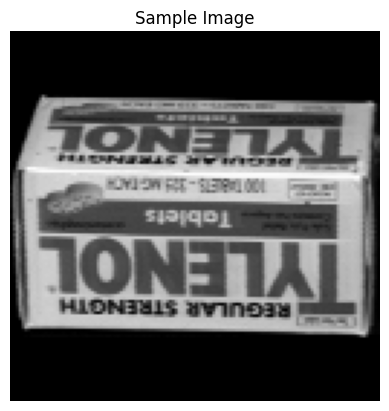

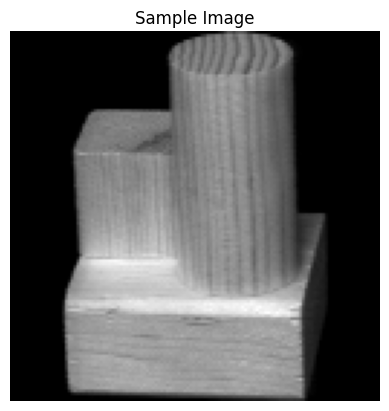

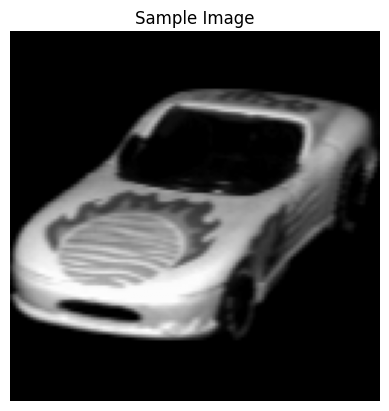

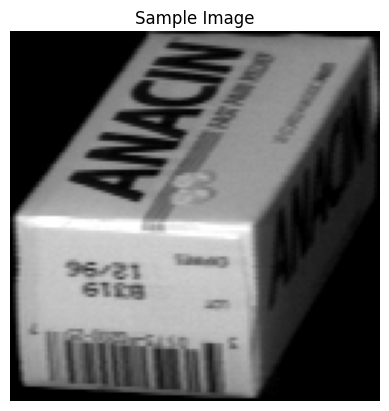

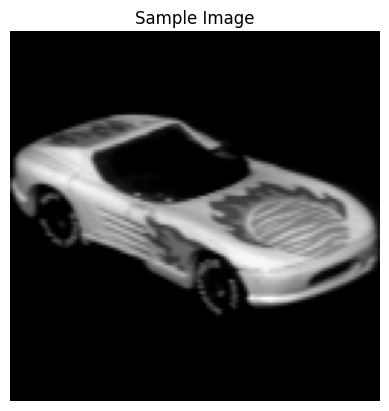

In [10]:
from sklearn.model_selection import train_test_split

train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

print(f"Training set size: {len(train_images)}, Testing set size: {len(test_images)}")

import matplotlib.pyplot as plt

n_samples = 5
for i in range(n_samples):
    plt.imshow(train_images[i])
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()

**Define the CNN Autoencoder model**

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_autoencoder(input_shape):
  encoder_input = keras.Input(shape=input_shape)

  # Encoder
  x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = layers.MaxPooling2D((2, 2), padding='same')(x)
  encoded = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)

  # Decoder
  x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(encoded)
  x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
  decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

  autoencoder = keras.Model(encoder_input, decoded)
  return autoencoder

**Build the model,Compile and print model summary**

In [12]:
input_shape = (128, 128, 3)
autoencoder = build_autoencoder(input_shape)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

**Train the model**

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - loss: 0.1541 - val_loss: 0.1358
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - loss: 0.1226 - val_loss: 0.0514
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - loss: 0.0357 - val_loss: 0.0136
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 0.0136 - val_loss: 0.0103
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - loss: 0.0095 - val_loss: 0.0085
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 0.0073 - val_loss: 0.0072
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0068 - val_loss: 0.0064
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0060 - val_loss: 0.0067
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.0062 - val_loss: 0.0057
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - loss: 0.0056 - val_loss: 0.0059
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 381ms/step - loss: 0.0058
Test Loss: 0.005867455154657364
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step


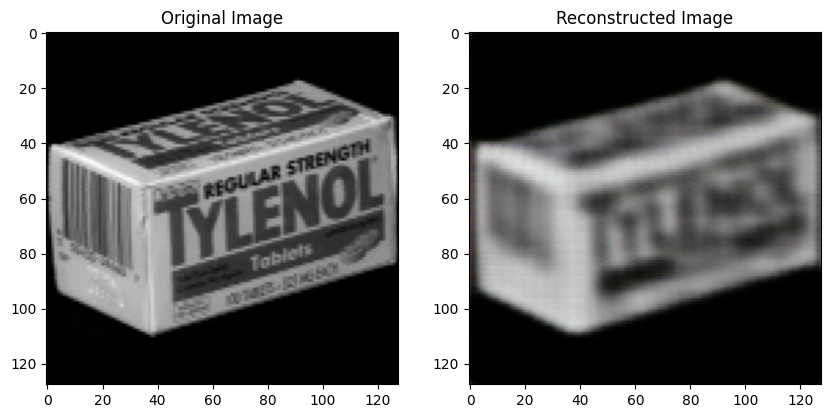

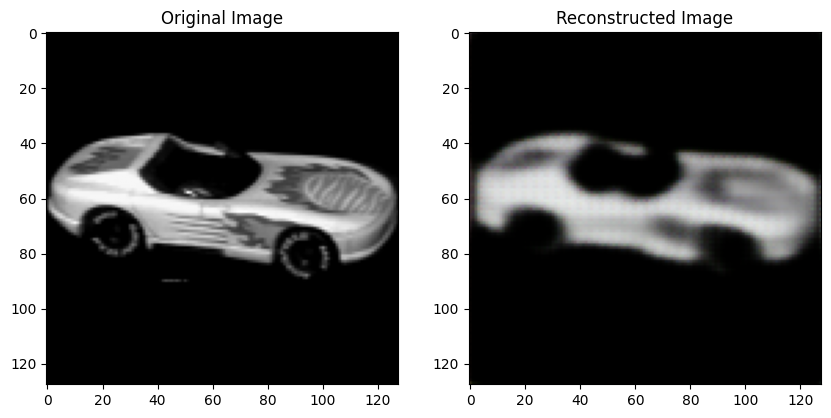

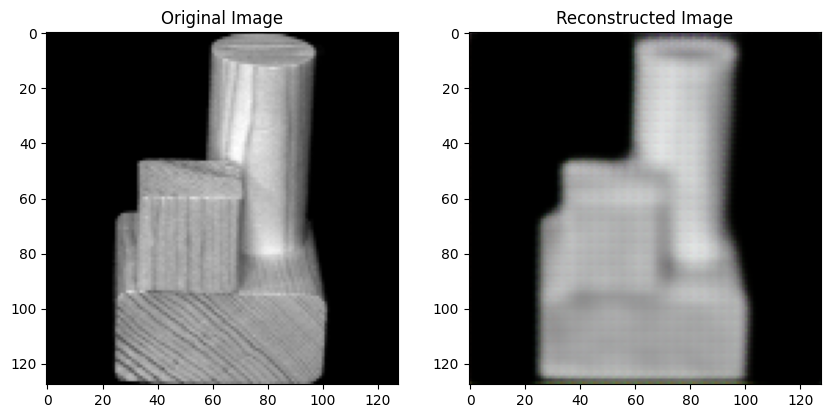

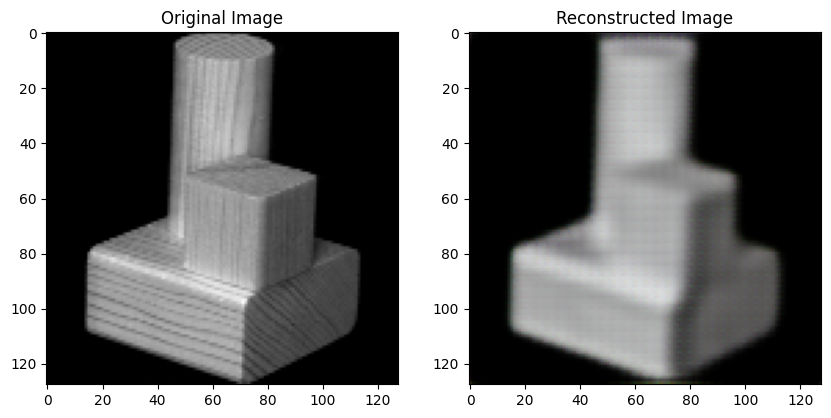

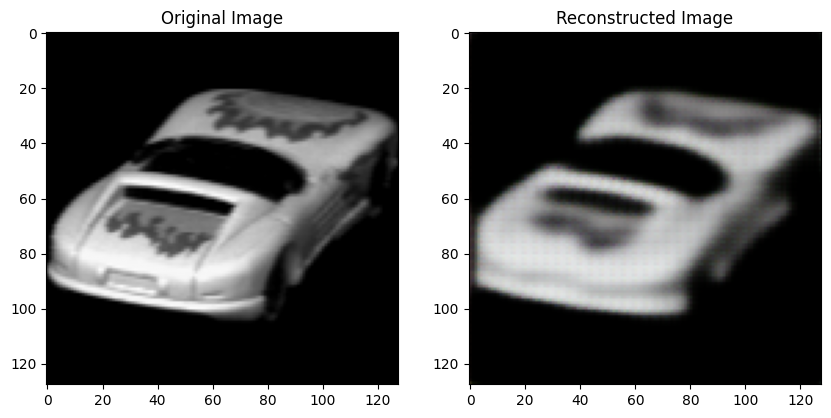

In [6]:
epochs = 10
batch_size = 32
history = autoencoder.fit(train_images, train_images, epochs=epochs, batch_size=batch_size,
                          validation_data=(test_images, test_images))

loss = autoencoder.evaluate(test_images, test_images)
print(f"Test Loss: {loss}")

reconstructed_images = autoencoder.predict(test_images)

**Display the original and reconstructed images**

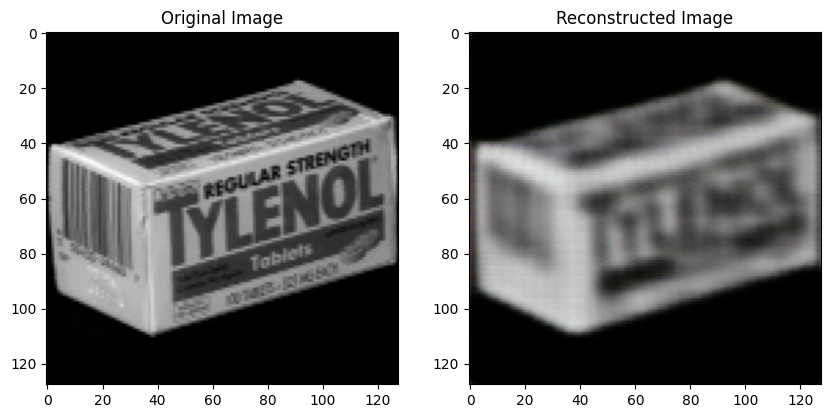

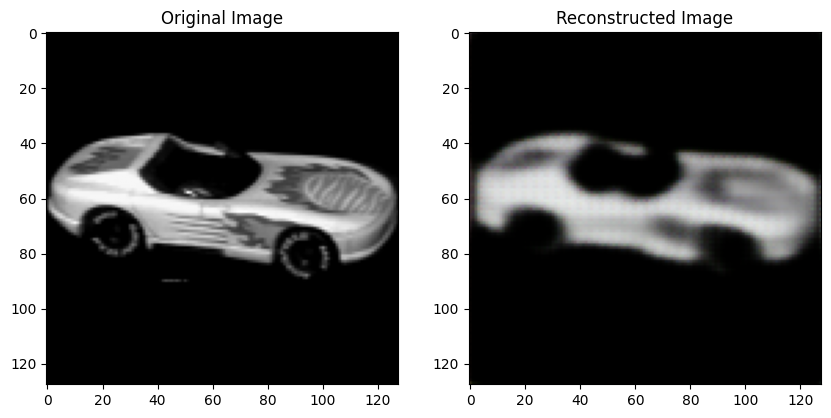

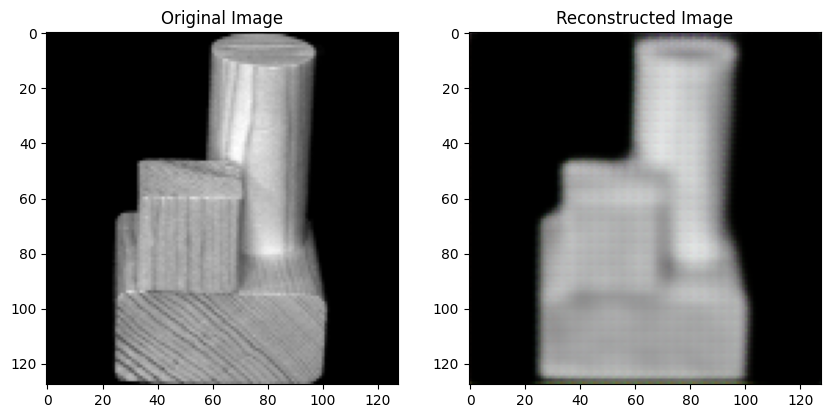

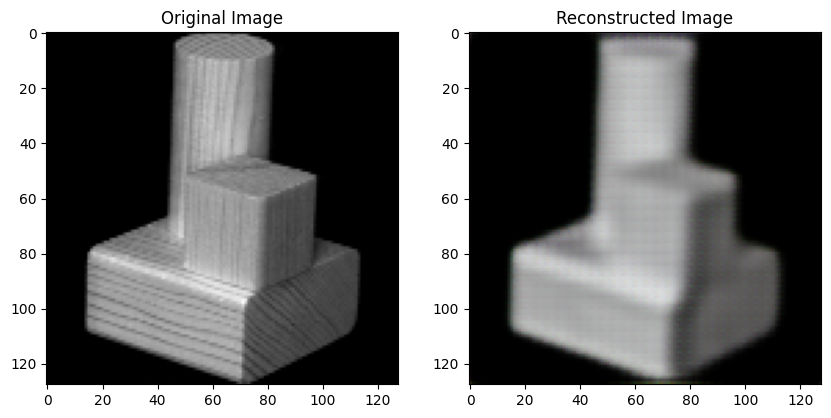

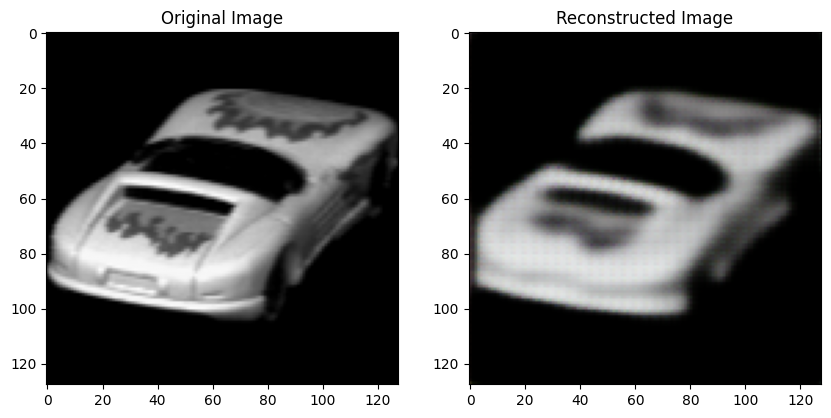

In [13]:
n_samples = 5
for i in range(n_samples):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(test_images[i])
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_images[i])
    plt.title("Reconstructed Image")

    plt.show()

** Use the Mean Squared Error (MSE) loss function.**

In [18]:
input_shape = (128, 128, 3)
autoencoder = build_autoencoder(input_shape)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 64, 64, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 128, 128, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 3)         │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

**Use Adam optimizer with a learning rate of 0.001.**

In [15]:
loss = autoencoder.evaluate(test_images, test_images)
print(f"Test Loss: {loss}")
reconstructed_images = autoencoder.predict(test_images)



3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step - loss: 0.1523
Test Loss: 0.15348605811595917
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step


**Train the model for 20 epochs with a suitable batch size.**

In [17]:
epochs = 10
batch_size = 32
history = autoencoder.fit(train_images, train_images, epochs=epochs, batch_size=batch_size,
                          validation_data=(test_images, test_images))

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - loss: 0.1499 - val_loss: 0.0991
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0690 - val_loss: 0.0183
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0156 - val_loss: 0.0129
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - loss: 0.0110 - val_loss: 0.0086
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - loss: 0.0103 - val_loss: 0.0106
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0111 - val_loss: 0.0087
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0089 - val_loss: 0.0102
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - loss: 0.0087 - val_loss: 0.0070
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - loss: 0.0069 - val_loss: 0.0068
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.0063 - val_loss: 0.0062


**Evaluate the model's performance using the testing set.**

In [19]:
import matplotlib.pyplot as plt
import numpy as np
mse_per_image = np.mean(np.square(test_images - reconstructed_images), axis=(1, 2, 3))

mse_overall = np.mean(mse_per_image)

print(f"Mean Squared Error (MSE) on the test set: {mse_overall}")

Mean Squared Error (MSE) on the test set: 0.15348604660058957


**Visualize MSE distribution**

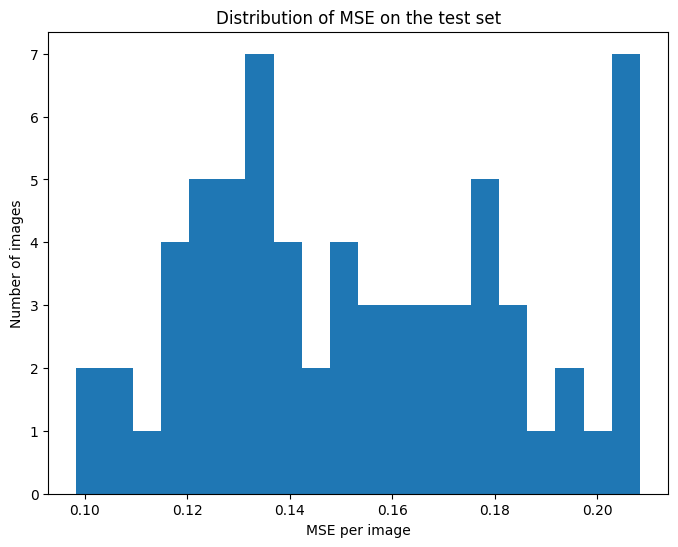

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(mse_per_image, bins=20)
plt.xlabel("MSE per image")
plt.ylabel("Number of images")
plt.title("Distribution of MSE on the test set")
plt.show()

**OverAll MSE**

In [23]:
import matplotlib.pyplot as plt

print(f"Mean Squared Error (MSE) on the test set: {mse_overall}")

Mean Squared Error (MSE) on the test set: 0.15348604660058957


**Loss curve during training.**

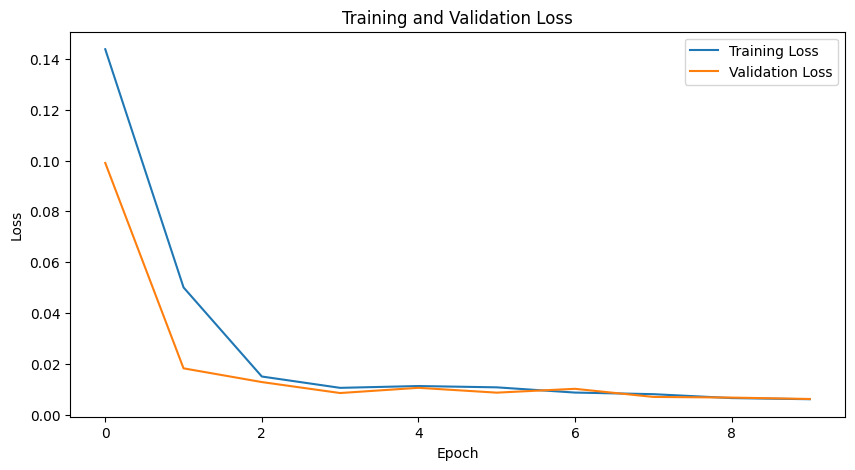

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

This report details the development and evaluation of a Convolutional Neural Network (CNN) autoencoder for image reconstruction using the COIL-20 dataset.


The model, built using TensorFlow/Keras, consists of an encoder and a decoder.  Images were preprocessed (resized to 128x128 and normalized) and split into training and testing sets.  The autoencoder was trained for 10 epochs using the Adam optimizer and Mean Squared Error (MSE) loss function.  


The model's performance was evaluated on the test set, and the overall MSE and its distribution across images were calculated and visualized.  Training and validation loss curves were also plotted to monitor model performance over epochs.  The final MSE provides a quantitative measure of the reconstruction quality.
